In [2]:
import pandas as pd

troop_movements_df = pd.read_csv('troop_movements.csv')

In [3]:
print(troop_movements_df)

               timestamp  unit_id           unit_type empire_or_resistance  \
0    2024-07-10 11:51:07        1        tie_silencer               empire   
1    2024-07-10 11:51:06        2               at-at               empire   
2    2024-07-10 11:51:05        3             unknown               empire   
3    2024-07-10 11:51:04        4  resistance_soldier               empire   
4    2024-07-10 11:51:03        5               at-st           resistance   
..                   ...      ...                 ...                  ...   
995  2024-07-10 11:34:32      996  resistance_soldier           resistance   
996  2024-07-10 11:34:31      997             unknown           resistance   
997  2024-07-10 11:34:30      998         tie_fighter           resistance   
998  2024-07-10 11:34:29      999               at-at           resistance   
999  2024-07-10 11:34:28     1000             unknown           resistance   

     location_x  location_y  destination_x  destination_y  home

In [4]:
res_counts = troop_movements_df.groupby('empire_or_resistance').size().reset_index(name="count")
print(res_counts)

  empire_or_resistance  count
0               empire    496
1           resistance    504


In [5]:
homeworld_counts = troop_movements_df.groupby('homeworld').size().reset_index(name="count")
print(homeworld_counts)

       homeworld  count
0       Alderaan     19
1    Aleen Minor     27
2     Bestine IV     21
3          Cerea     22
4       Champala     31
5      Chandrila     24
6   Concord Dawn     20
7       Corellia     24
8        Dagobah     22
9       Dathomir     25
10         Dorin     24
11        Eriadu     12
12   Glee Anselm     21
13    Haruun Kal     19
14       Iktotch     20
15      Iridonia     20
16         Kalee     20
17      Kashyyyk     31
18     Malastare     21
19        Mirial     25
20      Mon Cala     22
21    Muunilinst     33
22         Naboo     28
23          Ojom     29
24       Quermia     24
25         Rodia     25
26        Ryloth     25
27       Serenno     15
28         Shili     36
29         Skako     31
30       Socorro     27
31       Stewjon     19
32       Sullust     30
33      Tatooine     22
34       Tholoth     16
35      Toydaria     22
36     Trandosha     33
37       Troiken     21
38          Tund     22
39        Umbara     29
40       Vulpter

In [6]:
unit_counts = troop_movements_df.groupby('unit_type').size().reset_index(name="count")
print(unit_counts)

            unit_type  count
0               at-at    132
1               at-st    109
2  resistance_soldier    124
3        stormtrooper    115
4         tie_fighter    129
5        tie_silencer    125
6             unknown    133
7              x-wing    133


In [7]:
troop_movements_df["is_resistance"] = troop_movements_df["empire_or_resistance"].apply(lambda x: x == 'resistance')
print(troop_movements_df["is_resistance"])

0      False
1      False
2      False
3      False
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: is_resistance, Length: 1000, dtype: bool


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_12600\2690267637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resistance_counts.index, y=resistance_counts.values, palette='Set1')


Text(0, 0.5, 'Count')

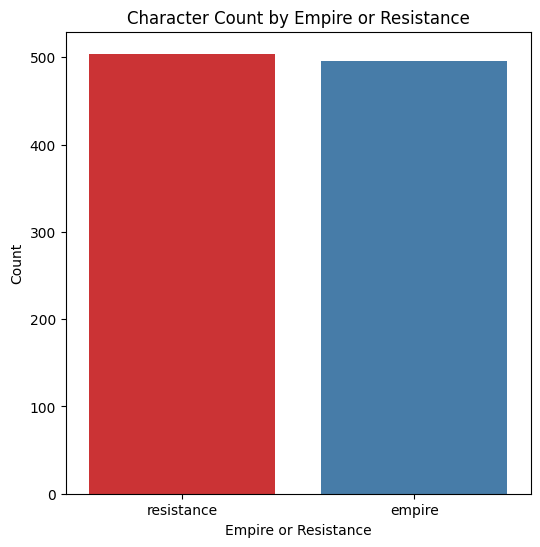

In [16]:
resistance_counts = troop_movements_df['empire_or_resistance'].value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=resistance_counts.index, y=resistance_counts.values, palette='Set1')
plt.title('Character Count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
features = pd.get_dummies(troop_movements_df[['homeworld', 'unit_type']])
target = troop_movements_df['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.1, random_state=42)


In [12]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.46


In [13]:
importances = dt_clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

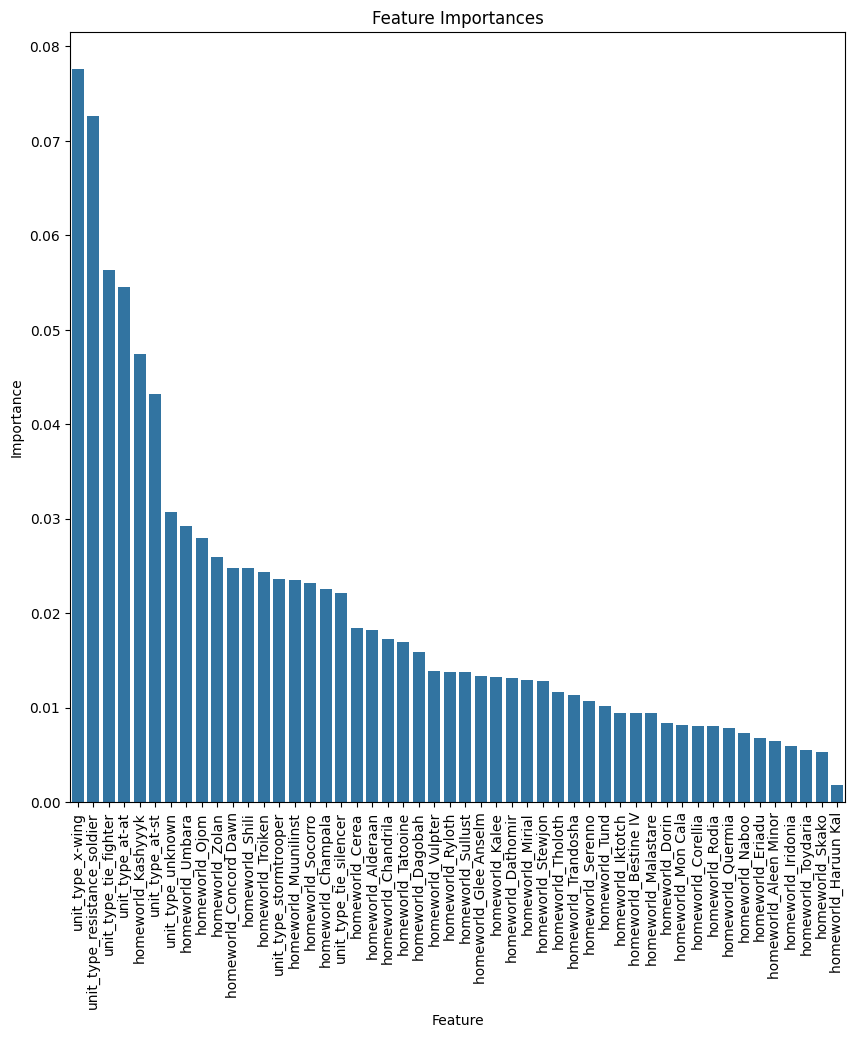

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(y="Importance", x="Feature", data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show()

In [15]:
import pickle

# Specify the file path to save the pipeline
file_path = 'troop_movements_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(dt_clf, file)